### 1. Raw Text - Model cant distinguish words
### 2. Clean Text - Remove stop words/ punctuations/streamming etc
### 3. Vectorizer - Convert to numeric forms
### 4. Machine Learning algorithm - Fit / Train model

# 1. NLP - Clean Text

#### Pre-processing text data
Clean up the text data is necessary to highlight attributes that you're going to want your machine learning sysytem to pickup on.Cleanning the data typically consists of a number of steps:
1. Remove puctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/Stem

The first three steps are covered in this chapter as they are implemented in pretty much any text cleaning piplines, lemmatizing and stepping are covered in the next chapter as they are helpful but not critical.


## 1.Raw data

In [1]:
# reading the raw text data
import pandas as pd
pd.set_option('display.max_colwidth', 100)

raw_data = pd.read_csv("SMSSpamCollection.tsv", header=None, sep='\t')
raw_data.columns = ['label', 'body_text']
raw_data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## 2. Cleaned Data

In [2]:
# reading the raw text data
import pandas as pd
pd.set_option('display.max_colwidth', 100)

cleaned_data = pd.read_csv("SMSSpamCollection_cleaned.tsv", header=0, sep='\t')
cleaned_data.columns = ['label', 'body_text', 'body_text_no_stopwords']
cleaned_data.head()

,label,body_text,body_text_no_stopwords
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


### 1. Removing the Punctuations

In [3]:
import string

def remove_punctuation(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return text_nonpunct

remove_punctuation("I will!>;!.,. ,,play. cricket, today")

'I will play cricket today'

In [22]:
raw_data['removed_punc'] = raw_data['body_text'].apply(lambda x: remove_punctuation(x))
raw_data.head()

,label,body_text,removed_punc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### 2. Tokenization and Lowering case

In [27]:
# NLTK Tokenizer
import nltk.word_tokenize

word_tokenized = nltk.word_tokenize("My name is Shubham. my last name is Sawant")
print(word_tokenized)

sent_tokenized = nltk.sent_tokenize("My name is Shubham. my last name is Sawant")
print(sent_tokenized)

ModuleNotFoundError: No module named 'nltk.word_tokenize'

In [6]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

raw_data['tokenize'] = raw_data['removed_punc'].apply(lambda x: tokenize(x.lower()))
raw_data.head()

,label,body_text,removed_punc,tokenize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### 3. Remove Stopwords 

In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[0:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [9]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

raw_data['removed_stopwords'] = raw_data['tokenize'].apply(lambda x: remove_stopwords(x))
raw_data.head()

,label,body_text,removed_punc,tokenize,removed_stopwords
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### 4. Stemming/ Lammetizing -
It is the process of reducing the inflected (or sometimes derived) words to their word stem or root

Stemming is able to determine that 'learned' and 'learning' , though they have different affixes, each contain the same root word 'learn'.

Real-world data often contains multiple occurrences of a word with different variations in spelling. All instances must be found.

Recall that stemming is a normalization technique but as most normalization problems (principal component analysis, for instance) it causes you to lose some of the original information that you have on your text.

### Reason of stemming
1. Reduces the corpus of words the model is exposed to
2. Explicitely correlated words with similar meaning

### Various Stemmers
1. Porter Stemmer
2. Snowball Stemmer
3. Lancaster Stemmer
4. Regex-Based Stemmer

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

porter = PorterStemmer()
snowball = SnowballStemmer(language='english')
lanc = LancasterStemmer()

# porter 
print("\nPorter Stemmer")
print(porter.stem('amazing'))
print(porter.stem('amazement'))
print(porter.stem('amaze'))
print(porter.stem('amazed'))
print(porter.stem('amazon'))

# snowball
print("\nSnowball Stemmer")
print(snowball.stem('amazing'))
print(snowball.stem('amazement'))
print(snowball.stem('amaze'))
print(snowball.stem('amazed'))
print(snowball.stem('amazon'))

# lancestor
print("\nLancestor Stemmer")
print(lanc.stem('amazing'))
print(lanc.stem('amazement'))
print(lanc.stem('amaze'))
print(lanc.stem('amazed'))
print(lanc.stem('amazon'))


Porter Stemmer
amaz
amaz
amaz
amaz
amazon

Snowball Stemmer
amaz
amaz
amaz
amaz
amazon

Lancestor Stemmer
amaz
amaz
amaz
amaz
amazon


#### 4.1 Porter Stemmer

In [11]:
import nltk
ps = nltk.PorterStemmer()

In [12]:
print(dir(ps))

['MARTIN_EXTENSIONS', 'NLTK_EXTENSIONS', 'ORIGINAL_ALGORITHM', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_apply_rule_list', '_contains_vowel', '_ends_cvc', '_ends_double_consonant', '_has_positive_measure', '_is_consonant', '_measure', '_replace_suffix', '_step1a', '_step1b', '_step1c', '_step2', '_step3', '_step4', '_step5a', '_step5b', 'mode', 'pool', 'stem', 'vowels']


In [13]:
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

raw_data['stemmed'] = raw_data['removed_stopwords'].apply(lambda x: stemming(x))
raw_data

,label,body_text,removed_punc,tokenize,removed_stopwords,stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, 750, pound, prize,...","[2nd, time, tried, 2, contact, u, u, 750, pound, prize, 2, claim, easy, call, 087187272008, now1...","[2nd, time, tri, 2, contact, u, u, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, ..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,The guy did some bitching but I acted like id be interested in buying something else next week a...,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, ...","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]","[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]"


### 5. Lemmatizing

Process of grouping together the inflected forms of a word so they can be analyzed as a single term, identified by the word's lemma.

Using vocabulary analysis of words aiming to remove inflectional endings to return the dictionary form of a word.

#### How lemmatizing is the different from stemming
- stemming is a typically faster as it simply chops off the end of a word using heuristics, without any understanding of the context in which word is used

- Lemmatizing is typically more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context of words.

In [14]:
import nltk 

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

print(dir(wn))

# stemmer 
print("\n--Stemmer--")
print(ps.stem('meanness'))
print(ps.stem('meaning'))

# lemmatizer
print("\n--Lemmatizer--")
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'lemmatize']

--Stemmer--
mean
mean

--Lemmatizer--
meanness
meaning


In [15]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

raw_data['lemmatized'] = raw_data['removed_stopwords'].apply(lambda x: lemmatizer(x))
raw_data.head()

,label,body_text,removed_punc,tokenize,removed_stopwords,stemmed,lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


# 2. NLP - Vectorizer

### Feature Vector - 
An n-dimensional vector of numerical features that represent some object

### Different Types - 
1. Count Vectorizor
2. N-Grams
3. Term-Frequency - Inverse Document Frequency (TF-IDF)

### 1. Count Vectorization
Creates a document term matrix where the entry of each cell will  be a count of the number of times that word occurred in that document.

In [16]:
# reading the raw text data
import pandas as pd
pd.set_option('display.max_colwidth', 100)

raw_data = pd.read_csv("SMSSpamCollection.tsv", header=None, sep='\t')
raw_data.columns = ['label', 'body_text']
raw_data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [17]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    
    return text

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(clean_text)
x_counts = count_vect.fit_transform(raw_data['body_text'])

print(x_counts.shape)
print(count_vect.get_feature_names())

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=<function clean_text at 0x000002320A0BD790> as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(5568, 8710)
['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '087004

In [19]:
x_count_df = pd.DataFrame(x_counts.toarray())
x_count_df

,0,1,2,3,4,5,6,7,8,9,...,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_count_df.columns = count_vect.get_feature_names()
x_count_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. N-Grams 
Creates a document-term matrix where counts still occupy the cell but instead of the columns repesenting single terms, they represent all combinations of adjecent words of length n in your text.

### 3. Term-Frequency - Inverse Document Frequency (TF-IDF)

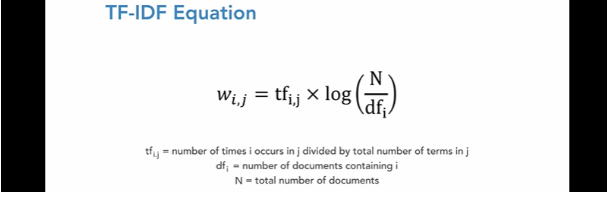

In [6]:
# reading the raw text data
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

ps = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
pd.set_option('display.max_colwidth', 100)

raw_data = pd.read_csv("SMSSpamCollection.tsv", header=None, sep='\t')
raw_data.columns = ['label', 'body_text']
raw_data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [7]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    
    return text

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(raw_data['body_text'])

print(x_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

### Vectorizers output sparse matrices
#### Sparse Matrix: 
A matrix in which most entries are 0, In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [10]:
x_tfidf_df = pd.DataFrame(x_tfidf.toarray())
x_tfidf_df.columns = tfidf_vect.get_feature_names()
x_tfidf_df

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
